# Borrador

Un poco de análisis de datos, y otro poco de intentos fallidos de modelos.

In [1]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Data

In [2]:
train_df = pd.read_csv('DataSet/travel_insurance_prediction_train.csv')
test_df = pd.read_csv('DataSet/travel_insurance_prediction_test.csv')

## Explore the Data

In [3]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [4]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


`TravelInsurance` is the column that we should predict. That column is not present in the test set.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [7]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


# Análisis de Datos

In [9]:
import seaborn

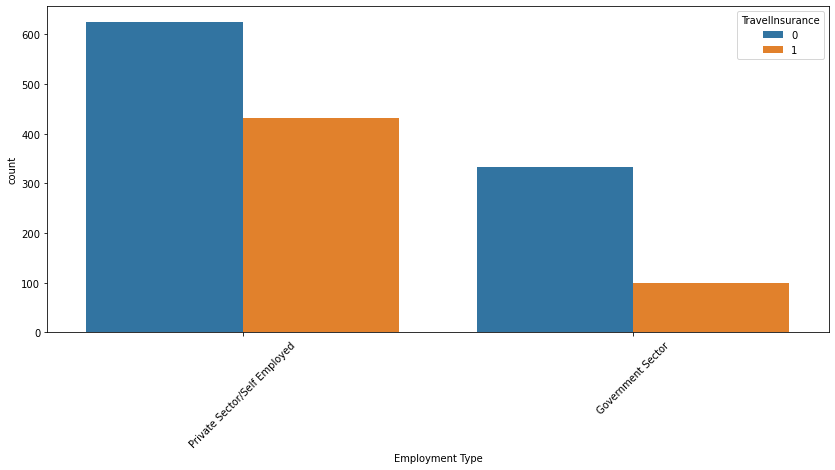

In [10]:
fig = plt.figure(figsize=(14, 6))

seaborn.countplot(data=train_df, x='Employment Type', hue='TravelInsurance')
plt.xticks(rotation=45);

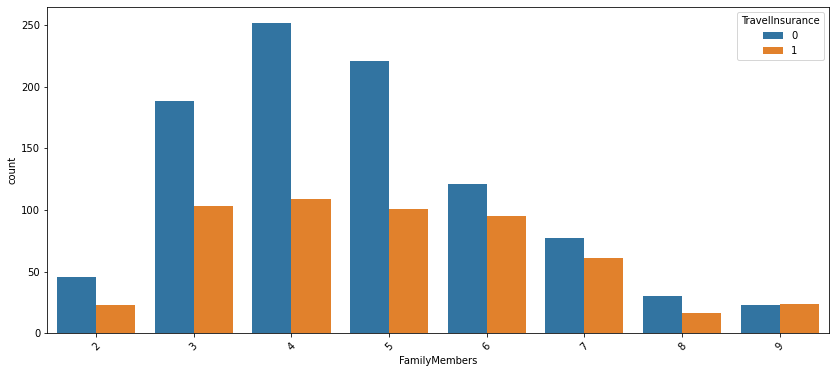

In [11]:
fig = plt.figure(figsize=(14, 6))

seaborn.countplot(data=train_df, x='FamilyMembers', hue='TravelInsurance')
plt.xticks(rotation=45);

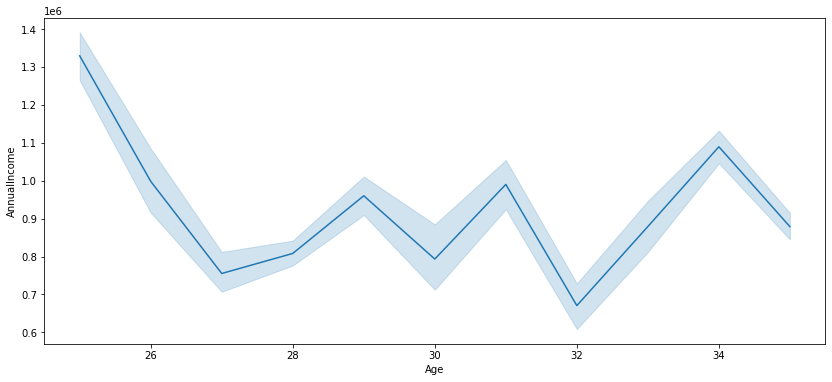

In [12]:
plt.figure(figsize=(14, 6))

seaborn.lineplot(data=train_df,
                 x='Age',
                 y='AnnualIncome',
                 estimator=np.mean);

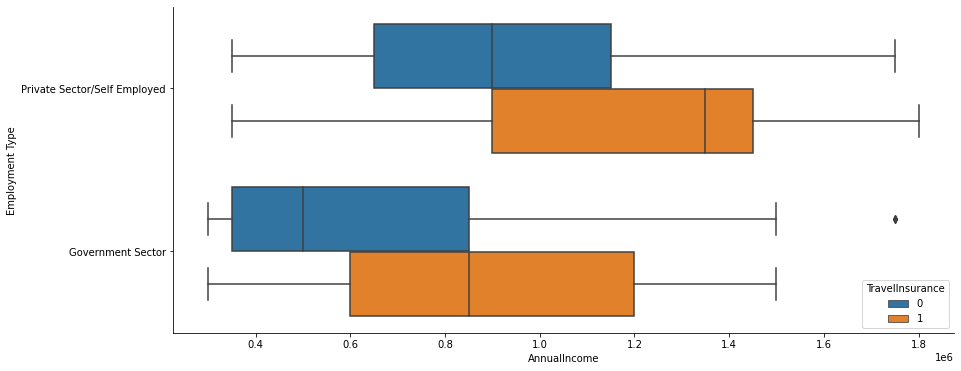

In [13]:
plt.figure(figsize=(14, 6))

seaborn.boxplot(x='AnnualIncome', y='Employment Type', hue='TravelInsurance', data=train_df)
seaborn.despine()

In [14]:
train_df[
    (train_df['Employment Type'] == 'Government Sector')
    &
    (train_df['AnnualIncome'] >= 1600000)
    &
    (train_df['TravelInsurance'] == 0)
        ]

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
227,228,31,Government Sector,No,1750000,2,0,No,No,0
1266,1267,32,Government Sector,Yes,1750000,6,0,No,No,0
1305,1306,33,Government Sector,Yes,1750000,4,0,No,No,0


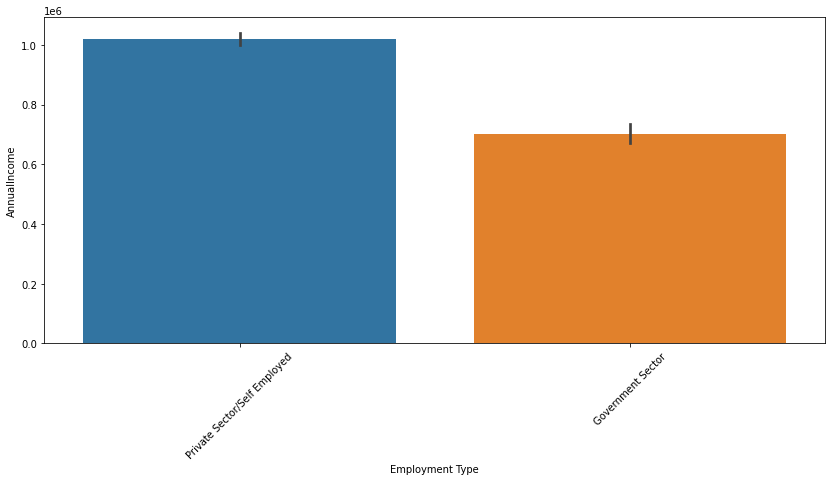

In [15]:
plt.figure(figsize=(14, 6))

seaborn.barplot(data=train_df,
                x='Employment Type',
                y='AnnualIncome',
                estimator=np.mean)
plt.xticks(rotation=45);

# Modelos

In [16]:
# Transform
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
# Model
from sklearn.model_selection import GridSearchCV
# Verification
from sklearn.metrics import classification_report

In [17]:
bin_cols = ['Age', 'AnnualIncome']
hot_cols = ['Employment Type', 'GraduateOrNot', 'FamilyMembers', 'FrequentFlyer', 'EverTravelledAbroad']

transformer = make_column_transformer(
    # Organizamos las columnas @bin_cols en intervalos.
    (KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), bin_cols),
    # Discretizamos las columnas @hot_cols en números.
    (OneHotEncoder(categories='auto', dtype='int', handle_unknown='ignore'), hot_cols),
    # Conservamos las columnas restantes.
    remainder='passthrough')

In [18]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=['Customer', 'TravelInsurance']))
y_train = train_df['TravelInsurance'].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=['Customer']))

## Probando con `Baseline`

In [19]:
from sklearn.tree import DecisionTreeClassifier

search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
}

tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_

In [20]:
predictions = best_tree_clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       958
           1       0.88      0.64      0.75       532

    accuracy                           0.84      1490
   macro avg       0.86      0.80      0.82      1490
weighted avg       0.85      0.84      0.84      1490



## Probando con `Random Forest`

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=123)
clf.fit(X_train, y_train);

In [22]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       958
           1       0.92      0.74      0.82       532

    accuracy                           0.89      1490
   macro avg       0.90      0.85      0.87      1490
weighted avg       0.89      0.89      0.88      1490



In [23]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5, 10, 15, 20],
}

forest = RandomForestClassifier(random_state=123)
forest_clf = GridSearchCV(forest, search_params, cv=5, scoring='f1', n_jobs=-1)
forest_clf.fit(X_train, y_train)

best_forest_clf = forest_clf.best_estimator_

In [24]:
predictions = best_forest_clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92       958
           1       0.92      0.75      0.83       532

    accuracy                           0.89      1490
   macro avg       0.90      0.86      0.87      1490
weighted avg       0.89      0.89      0.88      1490



## Probando con `SVM`

In [25]:
from sklearn.svm import LinearSVC, SVC

clf = LinearSVC(random_state=123)
clf.fit(X_train, y_train);

In [26]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       958
           1       0.78      0.47      0.58       532

    accuracy                           0.76      1490
   macro avg       0.77      0.70      0.71      1490
weighted avg       0.77      0.76      0.74      1490



In [28]:
clf = SVC(random_state=123)
clf.fit(X_train, y_train);

In [29]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       958
           1       0.87      0.55      0.67       532

    accuracy                           0.81      1490
   macro avg       0.83      0.75      0.77      1490
weighted avg       0.82      0.81      0.80      1490



In [30]:
search_params = {
    'C': [0.75, 1.0, 1.5, 2],
    'kernel': ['linear', 'poly', 'rbf']
}

svc = SVC(random_state=123)
svc_clf = GridSearchCV(svc, search_params, cv=5, scoring='f1', n_jobs=-1)
svc_clf.fit(X_train, y_train)

best_svc_clf = svc_clf.best_estimator_

In [31]:
predictions = best_svc_clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       958
           1       0.90      0.60      0.72       532

    accuracy                           0.83      1490
   macro avg       0.86      0.78      0.80      1490
weighted avg       0.84      0.83      0.82      1490



## Probando con `Boosting`

In [32]:
import xgboost as xgb

xg_clf = xgb.XGBClassifier(objective = 'binary:logistic',
                           colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 10, alpha = 10, n_estimators = 15,
                           use_label_encoder=False)
xg_clf.fit(X_train, y_train, eval_metric='mlogloss');

In [33]:
predictions = xg_clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       958
           1       0.90      0.47      0.62       532

    accuracy                           0.79      1490
   macro avg       0.83      0.72      0.74      1490
weighted avg       0.82      0.79      0.77      1490



## Probando con `Regression`

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=123)
clf.fit(X_train, y_train);

In [35]:
predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       958
           1       0.78      0.47      0.59       532

    accuracy                           0.76      1490
   macro avg       0.77      0.70      0.71      1490
weighted avg       0.77      0.76      0.75      1490



In [36]:
search_params = {
    'C': [0.5, 0.75, 1, 1.5, 2],
    'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag']
}

log_reg = LogisticRegression(random_state=123)
log_reg_clf = GridSearchCV(log_reg, search_params, cv=5, scoring='f1', n_jobs=-1)
log_reg_clf.fit(X_train, y_train)

best_log_reg_clf = log_reg_clf.best_estimator_

In [37]:
predictions = best_log_reg_clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       958
           1       0.78      0.47      0.59       532

    accuracy                           0.76      1490
   macro avg       0.77      0.70      0.71      1490
weighted avg       0.77      0.76      0.75      1490



# Otros

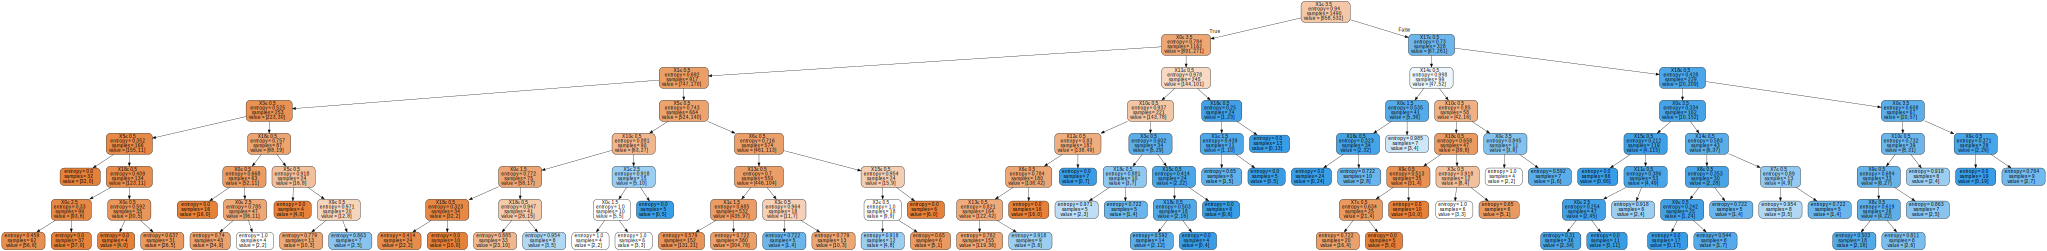

In [38]:
from sklearn import tree
import graphviz

# We are missing @feature_names and @class_names.
dot_data = tree.export_graphviz(best_tree_clf, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)

graphviz.Source(dot_data)

Idealmente, nuestras publicaciones tendrán las siguientes formas:

- `travel_insurance_submission_RandomForest.csv`
- `travel_insurance_submission_NeuralNetwork.csv`
- `travel_insurance_submission_???.csv`